In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Implementation

In [2]:
#imgpath = '/content/drive/MyDrive/8th Term/CV-asg 1/Hough Dataset/coins_1.jpg'
imgpath = '/content/drive/MyDrive/computer vision/CV-asg 1/Hough Dataset/coins5.jpg'

(1884, 1852)
<class 'numpy.ndarray'>


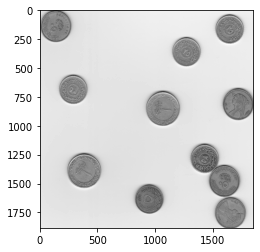

In [3]:
img = cv2.imread(imgpath)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img = cv2.imread(imgpath, 0)
print(gray_img.shape)
print(type(gray_img))
plt.imshow(gray_img,cmap='gray')

##Smoothing the image (2-dimensional median smoothing filter)

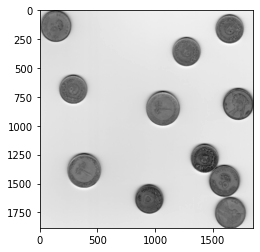

In [162]:
median = cv2.medianBlur(gray_img,9)
plt.imshow(median,cmap='gray')

## Edge Detection (Canny’s algorithm)

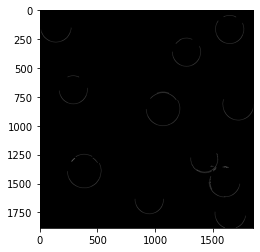

In [166]:
canny_edges = cv2.Canny(median,90,280)
plt.imshow(canny_edges,cmap='gray')

##Accumulation into (a, b)-space using circular Hough transform

In [45]:
def CHT(edges, r):
  newab = np.zeros_like(edges)
  b_range = edges.shape[1]
  for y,x in np.ndindex(edges.shape):
    if edges[y][x] == 255:
      for b in range(b_range):
        if r**2 >= (y - b)**2:
          a = x - np.sqrt(r**2 - (y - b)**2)
          a = int(round(a))
          newab[b,a] = newab[b,a] + 1
  return newab

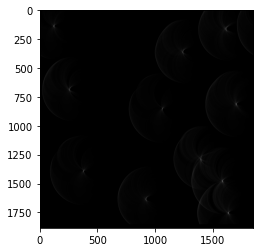

In [15]:
newab_pound = CHT(canny_edges,150)
plt.imshow(newab_pound,cmap='gray')

In [20]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max

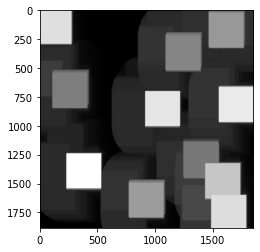

In [25]:
image_max = ndi.maximum_filter(newab_pound, size=300, mode='constant')
plt.imshow(image_max, cmap='gray')

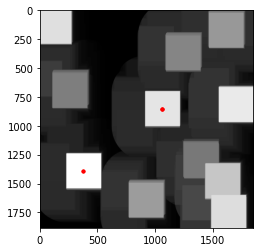

In [27]:
newab_pound2 = cv2.threshold(newab_pound, 100, 255,cv2.THRESH_BINARY)
coordinates = peak_local_max(newab_pound2[1], min_distance=300)
plt.imshow(image_max, cmap='gray')
plt.autoscale(False)
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')

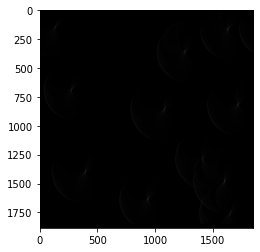

In [118]:
newab_50_piastres = CHT(canny_edges,135)
plt.imshow(newab_50_piastres,cmap='gray')

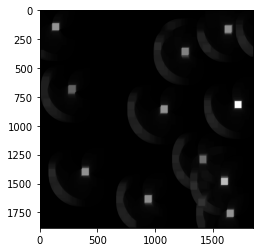

In [119]:
image_max_50 = ndi.maximum_filter(newab_50_piastres, size=58, mode='constant')
plt.imshow(image_max_50, cmap='gray')

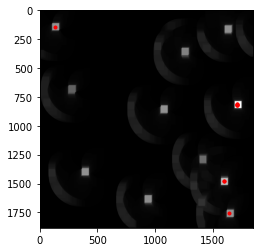

In [126]:
newab_50_piastres2 = cv2.threshold(newab_50_piastres, 96, 255,cv2.THRESH_BINARY)
coordinates = peak_local_max(newab_50_piastres2[1], min_distance=58)
plt.imshow(image_max_50, cmap='gray')
plt.autoscale(False)
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')

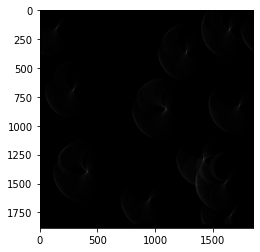

In [167]:
newab_25_piastres = CHT(canny_edges,122)
plt.imshow(newab_25_piastres,cmap='gray')

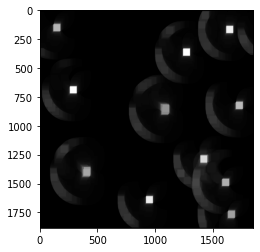

In [168]:
image_max_25 = ndi.maximum_filter(newab_25_piastres, size=58, mode='constant')
plt.imshow(image_max_25, cmap='gray')

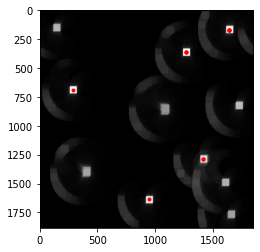

In [171]:
newab_25_piastres2 = cv2.threshold(newab_25_piastres, 90, 255,cv2.THRESH_BINARY)
coordinates = peak_local_max(newab_25_piastres2[1], min_distance=58)
plt.imshow(image_max_25, cmap='gray')
plt.autoscale(False)
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')

##Refining Coordinates and CHT Post-Processing

In [ ]:
def dist2(p1, p2):
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2

In [ ]:
def getPeeks(newab):
  centers_needed = cv2.threshold(newab, 120, 255,cv2.THRESH_BINARY)
  c = np.argwhere(centers_needed[1] > 0)
  newc = []
  prevp = c[0]
  newc.append(prevp)
  for p in c:
    if dist2(p,prevp) > 50:
        newc.append(p)
        prevp=p
  return np.array(newc)

In [ ]:
peeks_pound = getPeeks(newab_pound)
peeks_50_piastres = getPeeks(newab_50_piastres)
peeks_25_piastres = getPeeks(newab_25_piastres)

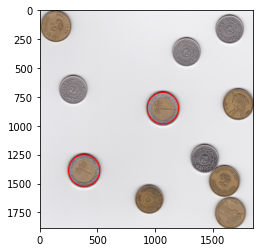

In [ ]:
for i in peeks_pound:
  cv2.circle(img,(i[1],i[0]),135,(255,0,0),7)
plt.imshow(img)

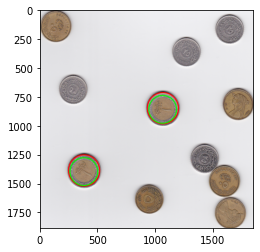

In [ ]:
for i in peeks_50_piastres:
  cv2.circle(img,(i[1],i[0]),120,(0,255,0),7)
plt.imshow(img)

In [ ]:
for i in peeks_25_piastres:
  cv2.circle(img,(i[1],i[0]),107,(0,0,255),7)
plt.imshow(img)

In [ ]:
print(peeks_pound.shape[0],"Pounds,",peeks_50_piastres.shape[0],"(50 Piasters) and",peeks_25_piastres.shape[0],"(25 Piasters) were detected.")
print("Total =",peeks_pound.shape[0] + 0.5 * peeks_50_piastres.shape[0] + 0.25 * peeks_25_piastres.shape[0],"Pounds")

1 Pounds, 1 (50 Piasters) and 1 (25 Piasters) were detected.
Total = 1.75 Pounds
